In [19]:
import pandas as pd
from os.path import join
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

In [20]:
DATA_PATH = '../data/wyniki/'

In [110]:
forum_names = [
    "gaming",
    "chess",
    "bioinformatics",
    "health", 
    "beer", 
    "bicycles", 
    "coffee", 
    "fitness", 
    "lifehacks", 
    "music", 
    "photo", 
    "travel",
    "vegetarianism", 
    "pets", 
    "parenting", 
    "cooking", 
    "bitcoin", 
    "astronomy", 
    "literature", 
    "sports"
]

In [111]:
for f in forum_names:
    print(f)

gaming
chess
bioinformatics
health
beer
bicycles
coffee
fitness
lifehacks
music
photo
travel
vegetarianism
pets
parenting
cooking
bitcoin
astronomy
literature
sports


In [122]:
results_0 = {
    'name': [],
    'communities_count': []
}

for f_name in forum_names:
    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    df_com = pd.read_csv(com_file)
    
    df_final = df_com.groupby('Representative').count().rename(columns={'Id': 'Count'})['Count'].reset_index()

    results_0['name'].append(f_name)
    results_0['communities_count'].append(df_final[df_final['Count'] != 1].shape[0])

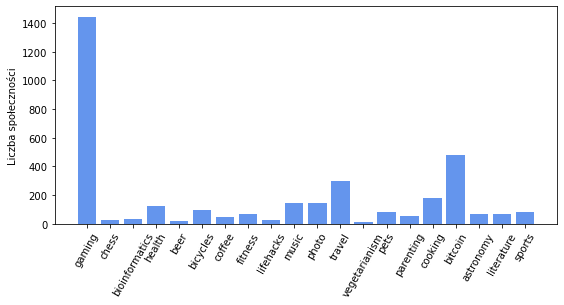

In [142]:
df = pd.DataFrame(results_0)

plt.figure(figsize=(9, 4))

plt.bar(x=df['name'], height=df['communities_count'], color='cornflowerblue')

plt.xticks(rotation=60)

plt.ylabel('Liczba społeczności')


plt.savefig('../graphs/graph_1.png', bbox_inches='tight', dpi=300)
plt.show()

In [120]:
df_final = df_com.groupby('Representative').count().rename(columns={'Id': 'Count'})['Count'].reset_index()

df_final[df_final['Count'] != 1]

,Representative,Count
8,36,16205
326,683,2
402,834,2
609,1237,2
669,1354,2
...,...,...
35611,72186,2
36458,73302,2
37181,74239,2
37524,74676,2


### Procent użytkowników izolowanych w zależności od forum

In [139]:
results = {}

for f_name in forum_names:

    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    df_com = pd.read_csv(com_file)

    users_count = df_com['Id'].count()
    isolated_users_count = df_com['GroupPopulation'].value_counts().loc[1]
    
    results[f_name] = isolated_users_count / users_count



In [140]:
results 

{'gaming': 0.6426545397595114,
 'chess': 0.7922643907753768,
 'bioinformatics': 0.7987593940116903,
 'health': 0.7938547486033519,
 'beer': 0.8447361442588173,
 'bicycles': 0.6634951934927286,
 'coffee': 0.8312537855844943,
 'fitness': 0.7208813838550248,
 'lifehacks': 0.8321785989222479,
 'music': 0.6972692427604673,
 'photo': 0.714322412959381,
 'travel': 0.6761098875623044,
 'vegetarianism': 0.8534786790638025,
 'pets': 0.6545670538542767,
 'parenting': 0.7325198247456277,
 'cooking': 0.6224336664644465,
 'bitcoin': 0.8070932126908967,
 'astronomy': 0.7938593333813261,
 'literature': 0.7999091012384957,
 'sports': 0.7104012465913517}

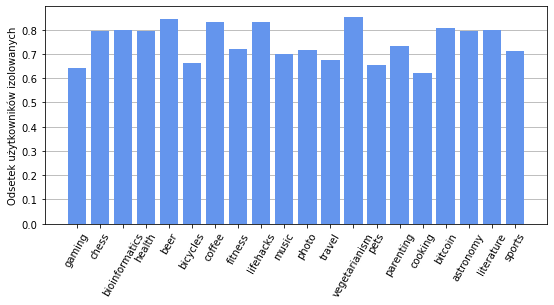

In [144]:
plt.figure(figsize=(9, 4))

plt.bar(x=results.keys(), height = results.values(), color='cornflowerblue', zorder=5)
plt.xticks(rotation=60)

plt.grid(axis='y', zorder=1)

plt.ylabel('Odsetek użytkowników izolowanych')

plt.savefig('../graphs/graph_2.png', bbox_inches='tight', dpi=300)

plt.show()

In [145]:
results_2 = {
    'name': [],
    'users_count': [],
    'isolated_users_count': []
}

for f_name in forum_names:

    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    df_com = pd.read_csv(com_file)

    users_count = df_com['Id'].count()
    isolated_users_count = df_com['GroupPopulation'].value_counts().loc[1]
    
    results_2['name'].append(f_name)
    results_2['isolated_users_count'].append(isolated_users_count)
    results_2['users_count'].append(users_count)

In [146]:
pd.DataFrame(results_2)

,name,users_count,isolated_users_count
0,gaming,172399,110793
1,chess,22028,17452
2,bioinformatics,8383,6696
3,health,16110,12789
4,beer,7542,6371
5,bicycles,40570,26918
6,coffee,8255,6862
7,fitness,24280,17503
8,lifehacks,24681,20539
9,music,54527,38020


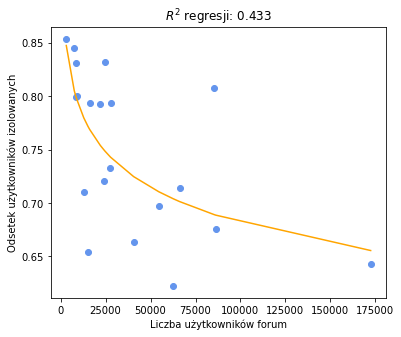

In [154]:
plt.figure(figsize=(6, 5))

df = pd.DataFrame(results_2).sort_values('users_count')

x = df['users_count']
y = df['isolated_users_count'] / df['users_count']

plt.scatter(
    x=x,
    y=y,
    color='cornflowerblue',
)

m, b = np.polyfit(np.log(x), y, 1)

plt.plot(x, m*np.log(x) + b, color='orange',)

r2 = r2_score(y, m*np.log(x) + b)

plt.title(f'$R^2$ regresji: {r2:.03f}')

plt.xlabel('Liczba użytkowników forum')
plt.ylabel('Odsetek użytkowników izolowanych')

plt.savefig('../graphs/graph_3-1.png', bbox_inches='tight', dpi=300)
plt.show()

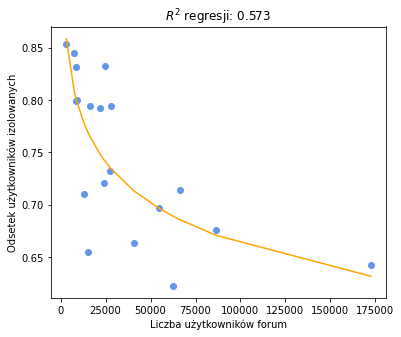

In [155]:
plt.figure(figsize=(6, 5))

df = pd.DataFrame(results_2).sort_values('users_count')
df = df[df['name'] != 'bitcoin']


x = df['users_count']
y = df['isolated_users_count'] / df['users_count']

plt.scatter(
    x=x,
    y=y,
    color='cornflowerblue',
)

m, b = np.polyfit(np.log(x), y, 1)

plt.plot(x, m*np.log(x) + b, color='orange',)

r2 = r2_score(y, m*np.log(x) + b)

plt.title(f'$R^2$ regresji: {r2:.03f}')

plt.xlabel('Liczba użytkowników forum')
plt.ylabel('Odsetek użytkowników izolowanych')

plt.savefig('../graphs/graph_3-2.png', bbox_inches='tight', dpi=300)
plt.show()

In [28]:
y

12    0.853479
4     0.844736
6     0.831254
2     0.798759
18    0.799909
19    0.710401
13    0.654567
3     0.793855
1     0.792264
7     0.720881
8     0.832179
14    0.732520
17    0.793859
5     0.663495
9     0.697269
15    0.622434
10    0.714322
16    0.807093
11    0.676110
0     0.642655
dtype: float64

In [29]:
x

12      3119
4       7542
6       8255
2       8383
18      8801
19     12835
13     15152
3      16110
1      22028
7      24280
8      24681
14     27617
17     27782
5      40570
9      54527
15     62638
10     66176
16     85321
11     86270
0     172399
Name: users_count, dtype: int64

### Kim są izolowani użytkownicy?

In [159]:
results_3 = {
    'name': [],
    'questions_with_no_answers': [],
    'answers_with_deleted_question_user': [],
    'lurkers': [],
    'isolated_users_count': []
}

for f_name in forum_names:

    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    posts_file = f'../data/Posts-{f_name}.csv'

    df_com = pd.read_csv(com_file)
    posts = pd.read_csv(posts_file)


    posts_merged = posts.merge(df_com, left_on='OwnerUserId', right_on='Id', how='left')

    posts_merged_isolated = posts_merged[posts_merged['GroupPopulation'] == 1]

    isolated_users_count = df_com['GroupPopulation'].value_counts().loc[1]

    questions_with_no_answers = posts_merged_isolated['PostTypeId'].value_counts().loc[1]
    answers_with_deleted_question_user = posts_merged_isolated['PostTypeId'].value_counts().loc[2]
    lurkers = isolated_users_count - questions_with_no_answers - answers_with_deleted_question_user
    
    results_3['name'].append(f_name)
    results_3['questions_with_no_answers'].append(questions_with_no_answers)
    results_3['answers_with_deleted_question_user'].append(answers_with_deleted_question_user)
    results_3['lurkers'].append(lurkers)
    results_3['isolated_users_count'].append(isolated_users_count)


In [160]:
df = pd.DataFrame(results_3)

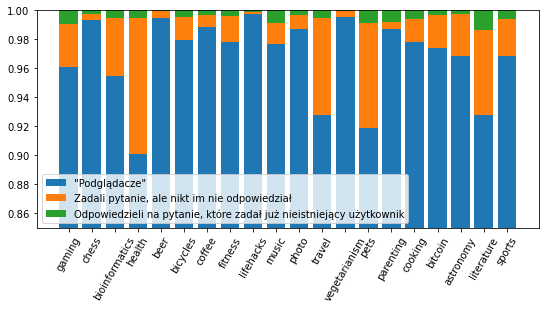

In [165]:
plt.figure(figsize=(9, 4))


plt.bar(df['name'], df['lurkers'] / df['isolated_users_count'], label='\"Podglądacze\"')

plt.bar(df['name'], df['questions_with_no_answers'] / df['isolated_users_count'], 
        bottom = df['lurkers'] / df['isolated_users_count'], label='Zadali pytanie, ale nikt im nie odpowiedział')

plt.bar(df['name'],  df['answers_with_deleted_question_user'] / df['isolated_users_count'], 
        bottom = (df['lurkers'] + df['questions_with_no_answers']) / df['isolated_users_count'], 
        label='Odpowiedzieli na pytanie, które zadał już nieistniejący użytkownik')


plt.ylim((0.85, 1))


plt.xticks(rotation=60)

plt.legend()

plt.savefig('../graphs/graph_4.png', bbox_inches='tight', dpi=300)
plt.show()

### Czas bycia na forum

In [170]:
f_name = 'gaming'

com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
users_file = f'../data/Users-{f_name}.csv'

df_com = pd.read_csv(com_file)
users = pd.read_csv(users_file)

<AxesSubplot:>

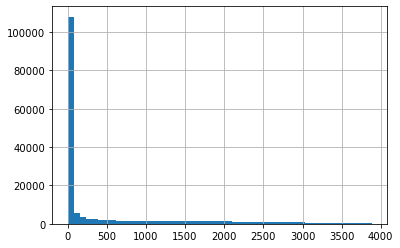

In [171]:
(pd.to_datetime(users['LastAccessDate']) - pd.to_datetime(users['CreationDate'])).dt.days.hist(bins=50)

In [172]:
users_merged = users.merge(df_com, left_on='Id', right_on='Id', how='left')

rep_main = df_com.groupby('Representative').count()['Id'].reset_index().sort_values('Id', ascending=False).iloc[0,0]

df_isolated = users[users_merged['GroupPopulation'] == 1]
df_main = users[users_merged['Representative'] == rep_main]

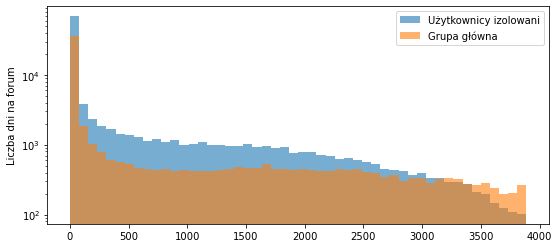

In [176]:
plt.figure(figsize=(9, 4))

days_isolated = (pd.to_datetime(df_isolated['LastAccessDate']) - pd.to_datetime(df_isolated['CreationDate'])).dt.days
days_main = (pd.to_datetime(df_main['LastAccessDate']) - pd.to_datetime(df_main['CreationDate'])).dt.days

plt.hist(days_isolated, bins=50, alpha=0.6, label='Użytkownicy izolowani')
plt.hist(days_main, bins=50, alpha=0.6, label='Grupa główna')


plt.legend()
plt.ylabel('Liczba dni na forum')
plt.yscale('log')


plt.savefig('../graphs/graph_5.png', bbox_inches='tight', dpi=300)
plt.show()

<ipython-input-182-5949b6176c44>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(forum_names[:10])


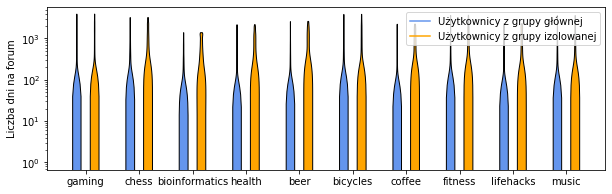

In [182]:
plt.figure(figsize=(10,3))

def setBoxColors(vp):
    plt.setp(vp['bodies'][0], color='cornflowerblue')
    plt.setp(vp['bodies'][1], color='orange')
    for x in vp['bodies']:
        x.set_edgecolor('black')
        x.set_alpha(1)

for i, f_name in enumerate(forum_names[:10]):
    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    users_file = f'../data/Users-{f_name}.csv'

    df_com = pd.read_csv(com_file)
    users = pd.read_csv(users_file)
    
    users_merged = users.merge(df_com, left_on='Id', right_on='Id', how='left')

    rep_main = df_com.groupby('Representative').count()['Id'].reset_index().sort_values('Id', ascending=False).iloc[0,0]

    df_isolated = users[users_merged['GroupPopulation'] == 1]
    df_main = users[users_merged['Representative'] == rep_main]
    
    days_isolated = (pd.to_datetime(df_isolated['LastAccessDate']) - pd.to_datetime(df_isolated['CreationDate'])).dt.days
    days_main = (pd.to_datetime(df_main['LastAccessDate']) - pd.to_datetime(df_main['CreationDate'])).dt.days
    
    vp = plt.violinplot([days_isolated, days_main], positions=[3*i, 3*i + 1], showmeans=False, showmedians=False,
        showextrema=False)
    setBoxColors(vp)
    
plt.yscale('log')

ax = plt.gca()

ax.set_xticklabels(forum_names[:10])
ax.set_xticks([3*i + 0.5 for i in range(10)])


hB, = plt.plot([1,1],'cornflowerblue')
hR, = plt.plot([1,1],'orange')
plt.legend((hB, hR),('Użytkownicy z grupy głównej', 'Użytkownicy z grupy izolowanej'))
hB.set_visible(False)
hR.set_visible(False)

plt.ylabel('Liczba dni na forum')

plt.savefig('../graphs/graph_6-1.png', bbox_inches='tight', dpi=300)
plt.show()

<ipython-input-181-6080d9d2cab2>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(forum_names[10:])


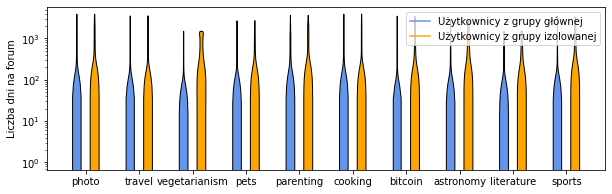

In [181]:
plt.figure(figsize=(10,3))

def setBoxColors(vp):
    plt.setp(vp['bodies'][0], color='cornflowerblue')
    plt.setp(vp['bodies'][1], color='orange')
    for x in vp['bodies']:
        x.set_edgecolor('black')
        x.set_alpha(1)

for i, f_name in enumerate(forum_names[10:]):
    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    users_file = f'../data/Users-{f_name}.csv'

    df_com = pd.read_csv(com_file)
    users = pd.read_csv(users_file)
    
    users_merged = users.merge(df_com, left_on='Id', right_on='Id', how='left')

    rep_main = df_com.groupby('Representative').count()['Id'].reset_index().sort_values('Id', ascending=False).iloc[0,0]

    df_isolated = users[users_merged['GroupPopulation'] == 1]
    df_main = users[users_merged['Representative'] == rep_main]
    
    days_isolated = (pd.to_datetime(df_isolated['LastAccessDate']) - pd.to_datetime(df_isolated['CreationDate'])).dt.days
    days_main = (pd.to_datetime(df_main['LastAccessDate']) - pd.to_datetime(df_main['CreationDate'])).dt.days
    
    vp = plt.violinplot([days_isolated, days_main], positions=[3*i, 3*i + 1], showmeans=False, showmedians=False,
        showextrema=False)
    setBoxColors(vp)
    
plt.yscale('log')

ax = plt.gca()

ax.set_xticklabels(forum_names[10:])
ax.set_xticks([3*i + 0.5 for i in range(10)])


hB, = plt.plot([1,1],'cornflowerblue')
hR, = plt.plot([1,1],'orange')
plt.legend((hB, hR),('Użytkownicy z grupy głównej', 'Użytkownicy z grupy izolowanej'))
hB.set_visible(False)
hR.set_visible(False)

plt.ylabel('Liczba dni na forum')

plt.savefig('../graphs/graph_6-2.png', bbox_inches='tight', dpi=300)
plt.show()

### User post count

In [91]:
f_name = 'gaming'

In [187]:
def liczba_pytan_od_odpowiedzi(f_name, n):
    df = pd.read_csv(f'../data/wyniki/UsersPostsCount-{f_name}.csv')


    com_file = join(DATA_PATH, f'Communities-{f_name}.csv')
    users_file = f'../data/Users-{f_name}.csv'

    df_com = pd.read_csv(com_file)
    users = pd.read_csv(users_file)

    users_merged = users.merge(df_com, left_on='Id', right_on='Id', how='left')

    users_merged['days'] = (pd.to_datetime(users_merged['LastAccessDate']) - pd.to_datetime(users_merged['CreationDate'])).dt.days

    df = df.merge(users_merged[['Id', 'days']], on='Id')


    plt.figure(figsize=(9, 4))

    sc = plt.scatter(df['NumberOfQuestions'], df['NumberOfAnswers'], c=df['days'], alpha=0.4)

    plt.xlabel('Liczba pytań')
    plt.ylabel('Liczba odpowiedzi')

    plt.xscale('symlog')
    plt.yscale('symlog')

    plt.colorbar(sc, label='Liczba dni na forum')
    
    plt.savefig(f'../graphs/graph_{n}.png', bbox_inches='tight', dpi=300)
    plt.show()

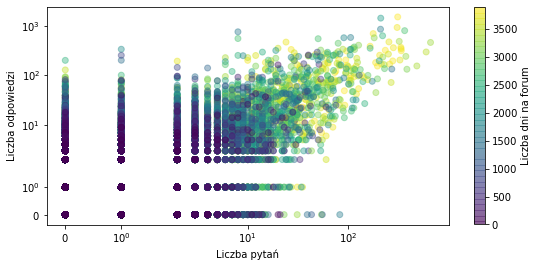

In [188]:
liczba_pytan_od_odpowiedzi('gaming', 7)

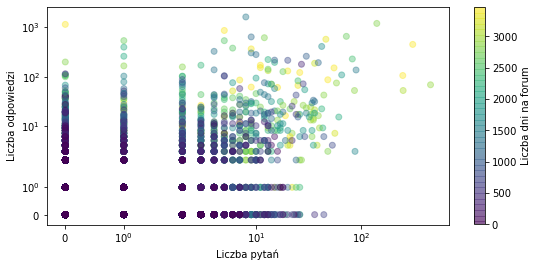

In [189]:
liczba_pytan_od_odpowiedzi('bitcoin', 8)

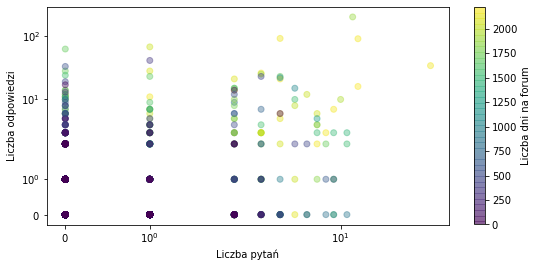

In [190]:
liczba_pytan_od_odpowiedzi('coffee', 9)